In [1]:
import os

os.environ["HUGGINGFACE_HUB_CACHE"] = "/data/sshadmin/bocheng/.cache/huggingface/hub/"

In [2]:
prompt = "Labrador in the style of Vermeer"
import torch
from diffusers import DiffusionPipeline
from diffusers.utils import make_image_grid

pipe = DiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, use_safetensors=True
)
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [3]:
generator=[torch.Generator(device='cuda').manual_seed(i) for i in range(4)]

  0%|          | 0/50 [00:00<?, ?it/s]

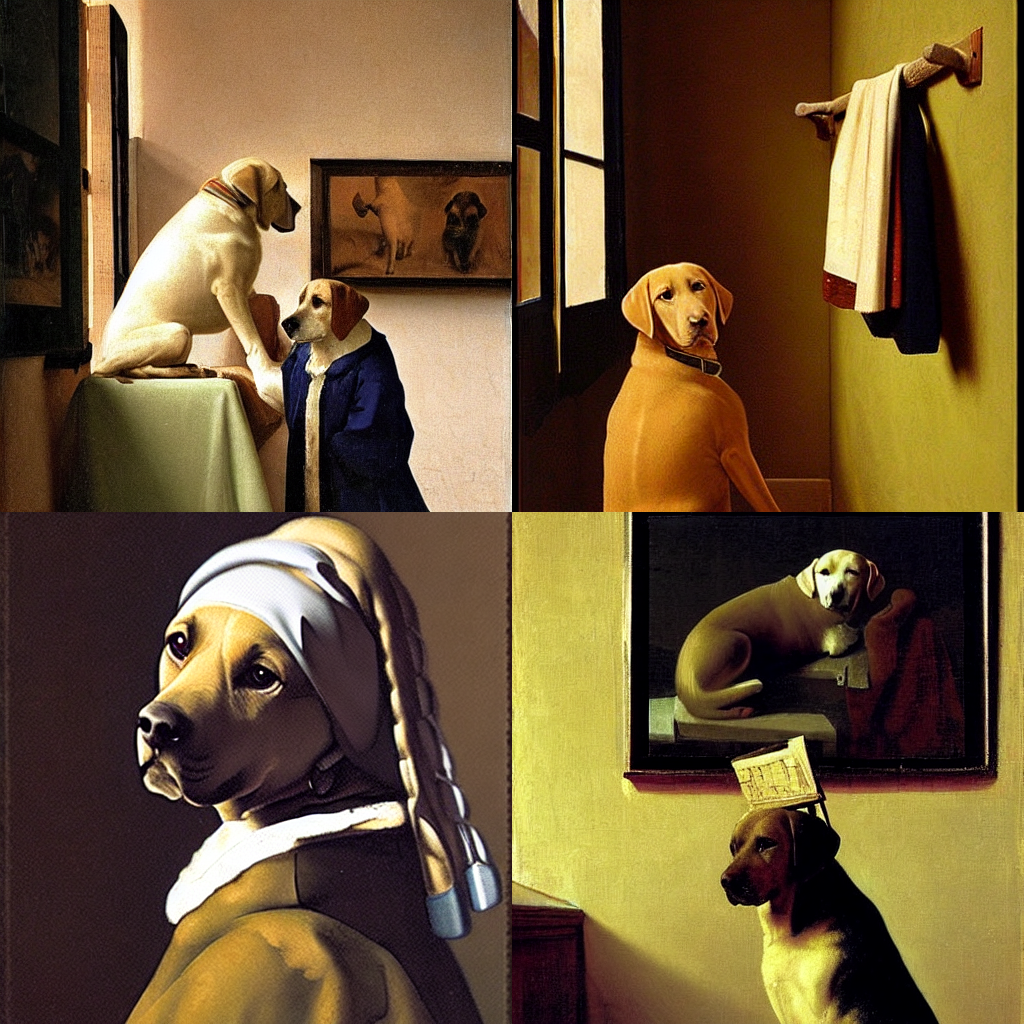

In [4]:
images=pipe(prompt,generator=generator,num_images_per_prompt=4).images
make_image_grid(images,rows=2,cols=2)

In [5]:
prompt = [
    prompt + t for t in [",highly realistic", ", artsy", "trending", ", colorful"]
]
generator = [torch.Generator(device="cuda").manual_seed(0) for i in range(4)]

  0%|          | 0/50 [00:00<?, ?it/s]

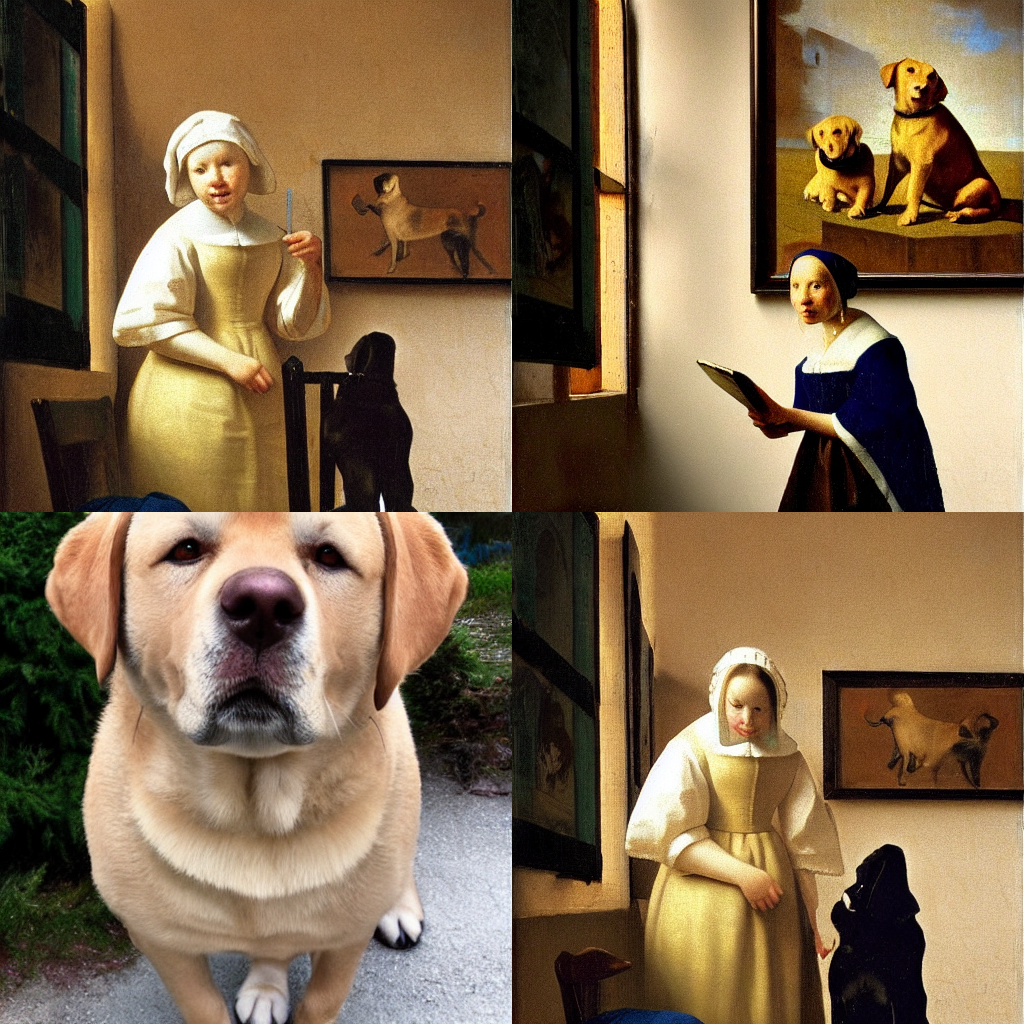

In [6]:
images = pipe(prompt, generator=generator).images
make_image_grid(images, rows=2, cols=2)